In [1]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [2]:
from tooling.config import Experiment, Transformation
from tooling.loading import load_dataset, import_dataset
from tooling.config import SNERConfig, SNER
from omegaconf import OmegaConf
from copy import deepcopy
import os
import pandas as pd
from copy import deepcopy
import rich
from data.tooling import cleanup_files
from tooling.transformation import transform_dataset
from tooling.model import TORE_LABELS_NONE, LABELS_NONE
from pathlib import Path

os.environ["DISABLE_MLFLOW"] = "1"


raw_transformation = Transformation(
    description="None",
    type="Full",
    task="Task",
    goals="Goals",
    domain_data="Domain_Data",
    activity="Activity",
    stakeholder="Stakeholder",
    system_function="System_Function",
    interaction="Interaction",
    interaction_data="Interaction_Data",
    workspace="Workspace",
    software="System_Level",
    internal_action="Internal_Action",
    internal_data="Internal_Data",
    system_level="System_Level",
)

final_label_transformation_config = Transformation(
    description="None",
    type="Full",
    task="Task",
    domain_data="Domain_Data",
    activity="Activity",
    stakeholder="Stakeholder",
    system_function="System_Function",
    interaction="Interaction",
    interaction_data="Interaction_Data",
    workspace="Workspace",
    software="System_Level",
    internal_action="System_Level",
    internal_data="System_Level",
    system_level="System_Level",
)

level_transformation_config = Transformation(
    description="None",
    type="Full",
    task="Domain_Level",
    domain_data="Domain_Level",
    activity="Domain_Level",
    stakeholder="Domain_Level",
    system_function="Interaction_Level",
    interaction="Interaction_Level",
    interaction_data="Interaction_Level",
    workspace="Interaction_Level",
    software="System_Level",
    internal_action="System_Level",
    internal_data="System_Level",
    system_level="System_Level",
)

sner_config = SNER()

In [3]:
savepath = Path("~/Documents/MA/ma_latex/images/40_design/").expanduser()
savepath.joinpath("image.png")

PosixPath('/Users/bockstaller/Documents/MA/ma_latex/images/40_design/image.png')

################
dataset='forum'
sentence count = 865
minimum sentence length = 1
mean sentence length = 16.68208092485549
std deviation sentence length = 12.431365845145537
max sentence length = 106
################
dataset='prolific'
sentence count = 1344
minimum sentence length = 1
mean sentence length = 19.796875
std deviation sentence length = 10.453155685903914
max sentence length = 72
################
dataset='komoot'
sentence count = 901
minimum sentence length = 1
mean sentence length = 16.51387347391787
std deviation sentence length = 11.72722741607827
max sentence length = 87


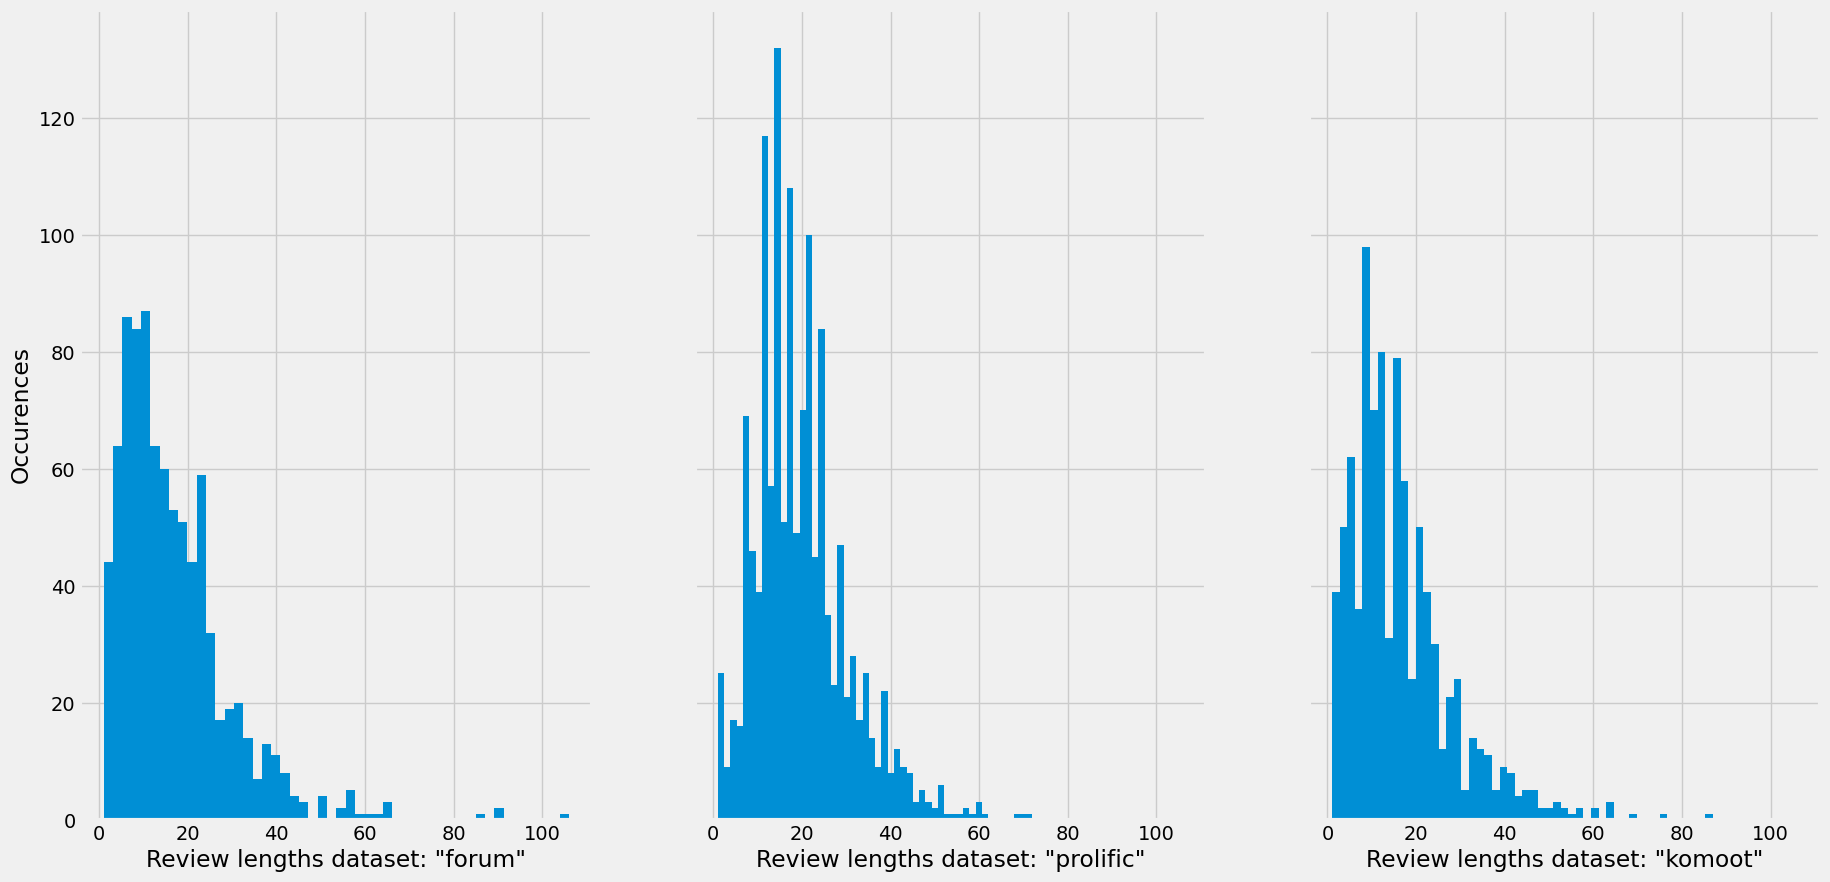

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)

for idx, dataset in enumerate(["forum", "prolific", "komoot"]):
    base_experiment_config = Experiment(
        name="Base Config", iterations=1, force=False, dataset=dataset
    )

    cfg: SNERConfig = OmegaConf.structured(
        SNERConfig(
            sner=SNER(),
            experiment=base_experiment_config,
            transformation=final_label_transformation_config,
        )
    )

    run_name = f"dataset_stats_{dataset}"

    import_dataset(cfg, run_name=run_name)

    loaded_dataset = load_dataset(name=run_name)

    sentences = loaded_dataset[["sentence_id"]].value_counts()
    print("################")
    print(f"{dataset=}")
    print(f"sentence count = {sentences.count()}")
    print(f"minimum sentence length = {sentences.min()}")
    print(f"mean sentence length = {sentences.mean()}")
    print(f"std deviation sentence length = {sentences.std()}")
    print(f"max sentence length = {sentences.max()}")

    sentences.plot(
        ax=axes[idx],
        kind="hist",
        grid=True,
        figsize=(20, 10),
        bins=50,
        ylabel="Occurences",
        xlabel=f'Review lengths dataset: "{dataset}"',
    )

    fig.savefig(
        savepath.joinpath("review_length_distribution.png"),
        bbox_inches="tight",
    )

plt.show()

Post Transformation


tore_label       
0                    11715
Domain_Level           430
Interaction_Level     1557
System_Level           728
Name: count, dtype: int64

Post Transformation


tore_label       
0                    19440
Domain_Level          2644
Interaction_Level     3564
System_Level           959
Name: count, dtype: int64

Post Transformation


tore_label       
0                    10281
Domain_Level           990
Interaction_Level     3116
System_Level           492
Name: count, dtype: int64

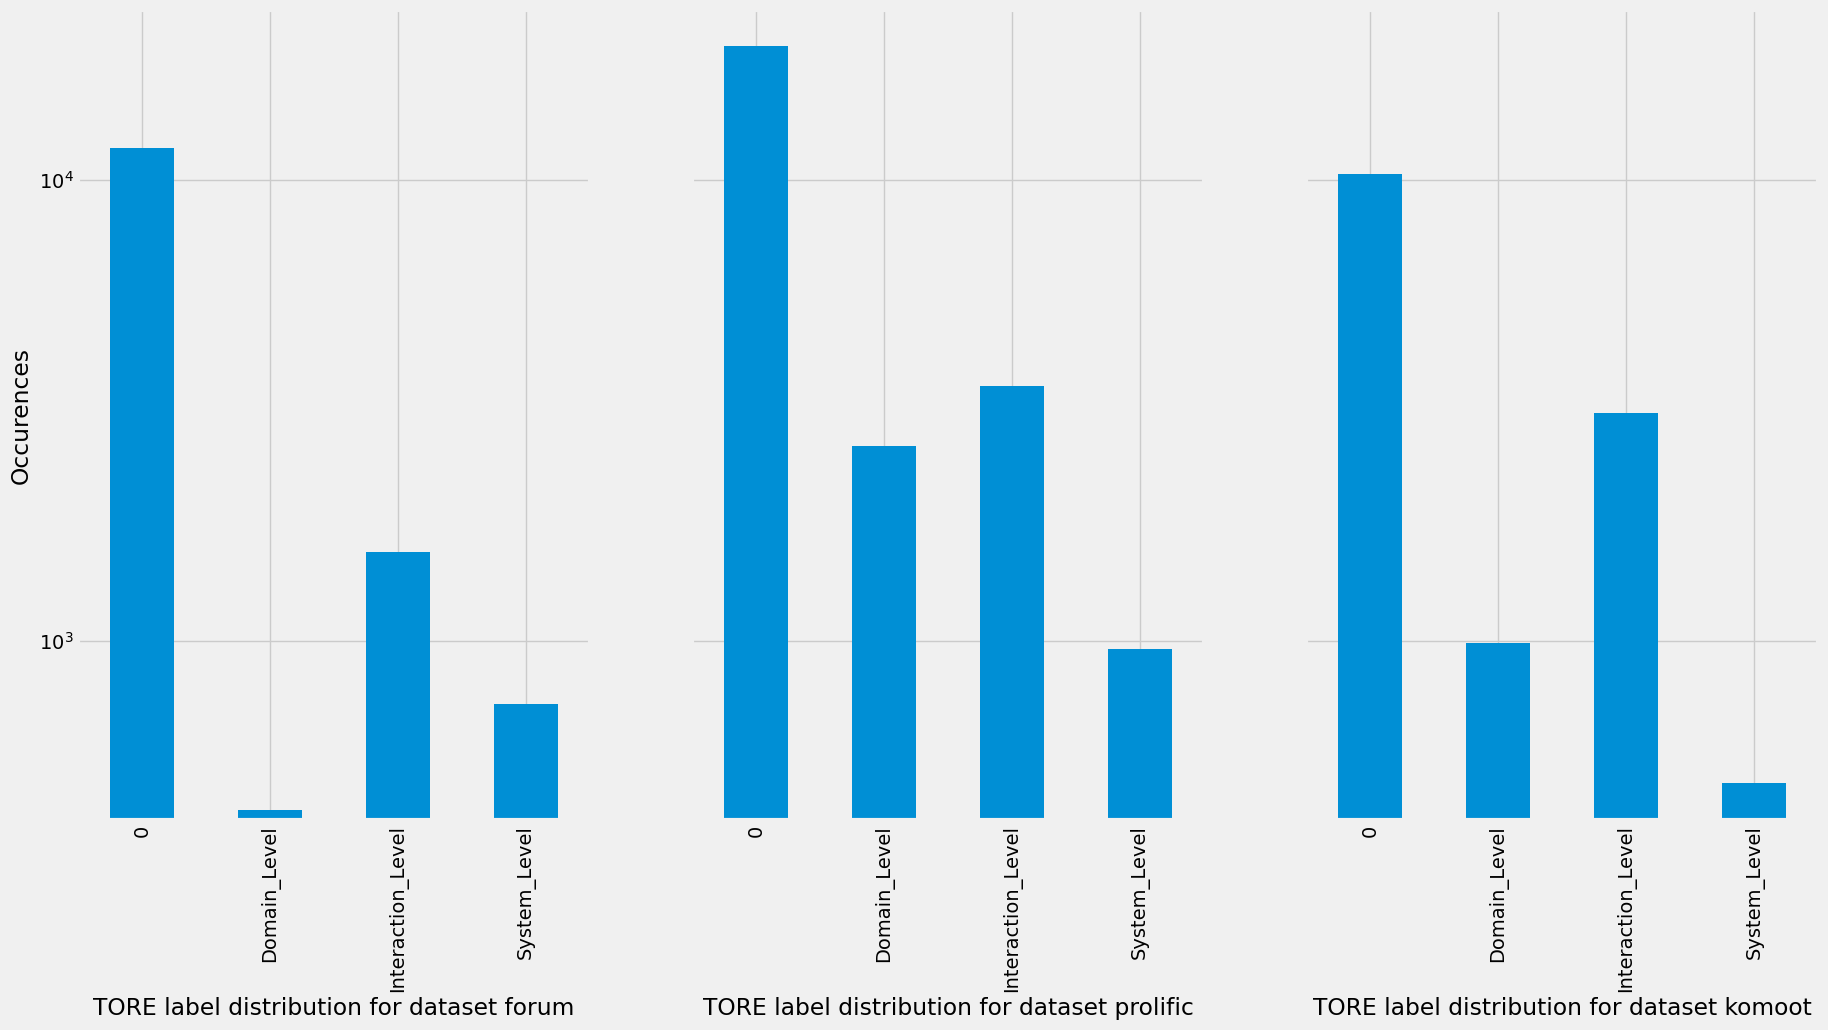

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)


for idx, dataset in enumerate(["forum", "prolific", "komoot"]):
    base_experiment_config = Experiment(
        name="Base Config", iterations=1, force=False, dataset=dataset
    )

    cfg: SNERConfig = OmegaConf.structured(
        SNERConfig(
            sner=SNER(),
            experiment=base_experiment_config,
            transformation=level_transformation_config,
        )
    )

    run_name = f"dataset_stats_{dataset}"

    transformed_dataset = transform_dataset(
        cfg, run_name, fill_with_zeros=True
    )["dataset"]

    tore_label = transformed_dataset[["tore_label"]].value_counts()

    tore_label = tore_label.sort_index(
        key=lambda x: list(map(list(LABELS_NONE).index, x))
    )

    print("Post Transformation")
    rich.print(tore_label)

    ticks = [index[0] for index in tore_label.index.tolist()]

    ax = tore_label.plot.bar(
        ax=axes[idx],
        logy=True,
        xlabel=f"TORE label distribution for dataset {dataset}",
        ylabel="Occurences",
        xticks=range(len(ticks)),
    )

    ax.set_xticks(range(len(ticks)), ticks)

fig.set_figwidth(20)
fig.set_figheight(10)

fig.savefig(savepath.joinpath("level_distribution.png"), bbox_inches="tight")

plt.show()

Number of sentences


Pre Transformation


tore_label      
0                   11715
Task                    1
Goals                   0
Domain_Data           306
Activity               90
Stakeholder            33
System_Function         5
Interaction           654
Interaction_Data      517
Workspace             381
Internal_Action        55
Internal_Data          61
System_Level          612
Name: count, dtype: int64

Pre Transformation


tore_label      
0                   19435
Task                  488
Goals                   5
Domain_Data          1348
Activity              385
Stakeholder           423
System_Function      1172
Interaction          1091
Interaction_Data     1198
Workspace             103
Internal_Action        64
Internal_Data          95
System_Level          800
Name: count, dtype: int64

Pre Transformation


tore_label      
0                   10281
Task                  183
Goals                   0
Domain_Data           564
Activity              137
Stakeholder           106
System_Function       649
Interaction          1060
Interaction_Data     1263
Workspace             144
System_Level          492
Name: count, dtype: int64

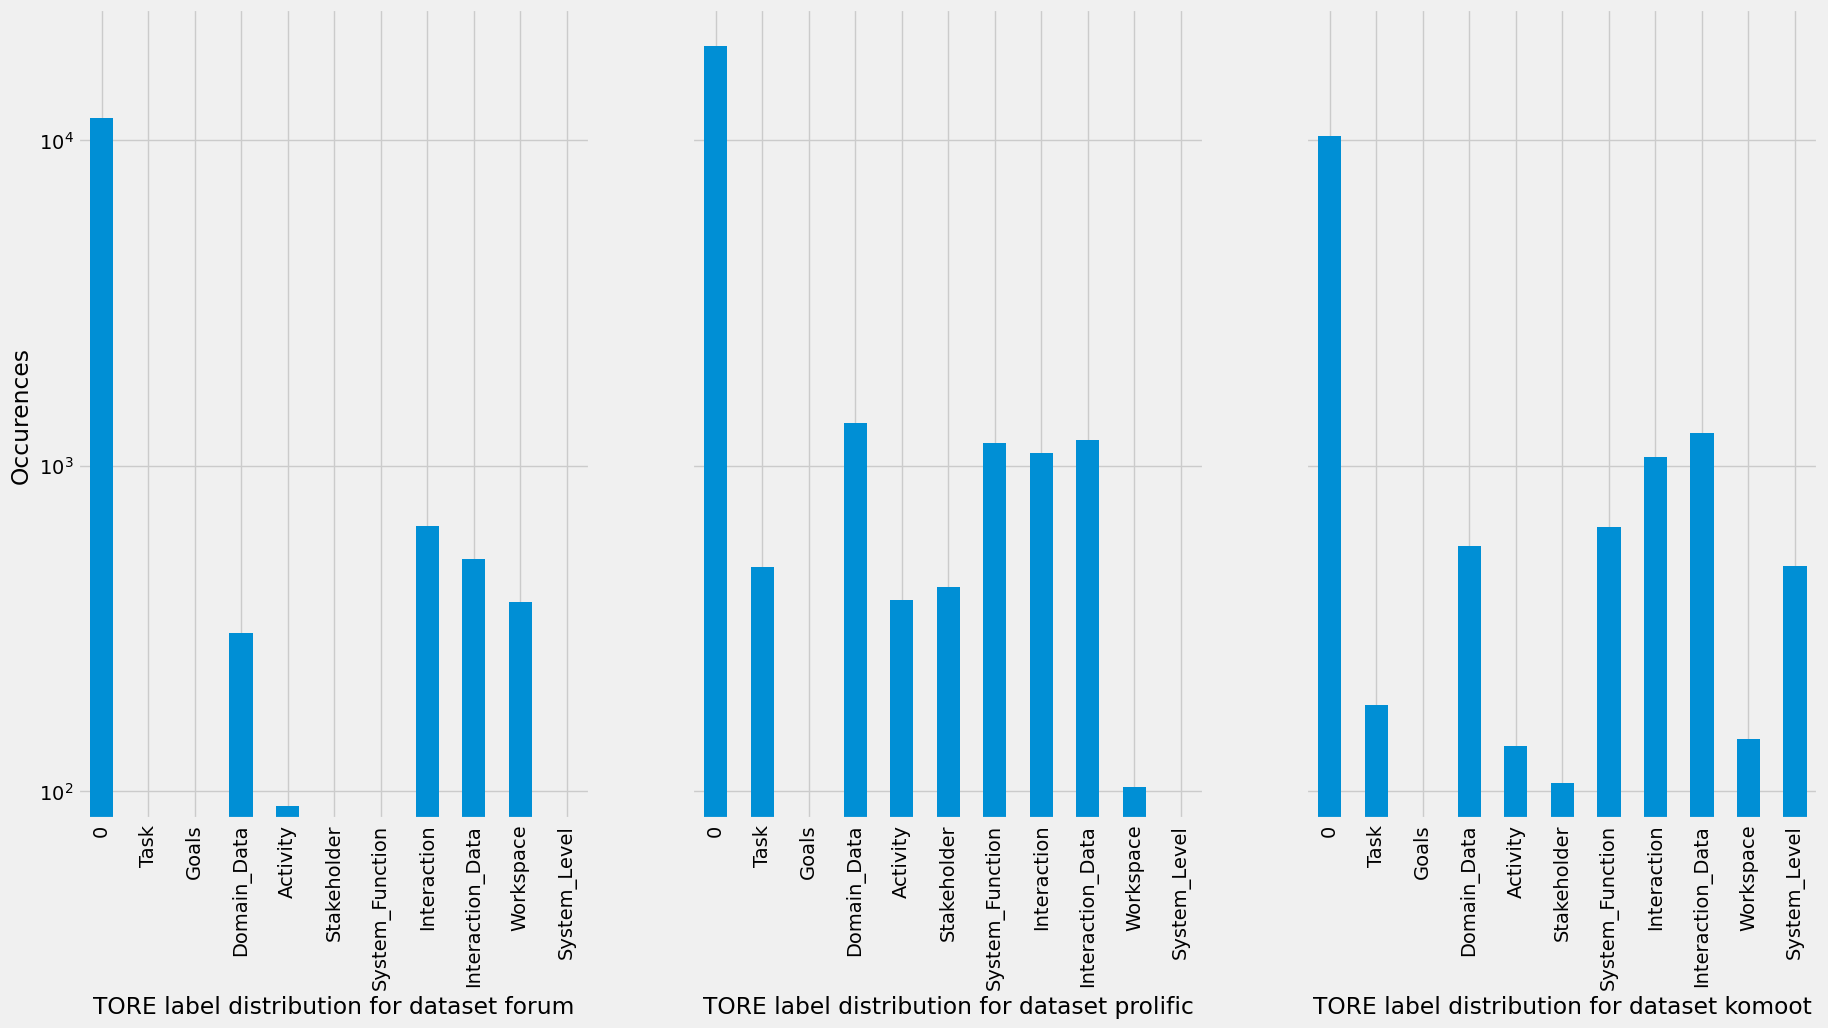

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)


for idx, dataset in enumerate(["forum", "prolific", "komoot"]):
    base_experiment_config = Experiment(
        name="Base Config", iterations=1, force=False, dataset=dataset
    )

    cfg: SNERConfig = OmegaConf.structured(
        SNERConfig(
            sner=SNER(),
            experiment=base_experiment_config,
            transformation=raw_transformation,
        )
    )

    run_name = f"dataset_stats_{dataset}"

    transformed_dataset = transform_dataset(
        cfg, run_name, fill_with_zeros=True
    )["dataset"]

    tore_label = transformed_dataset[["tore_label"]].value_counts()

    if "Goals" not in tore_label.index:
        tore_label["Goals"] = 0

    tore_label = tore_label.sort_index(
        key=lambda x: list(map(list(LABELS_NONE).index, x))
    )

    print("Pre Transformation")
    rich.print(tore_label)

    ticks = [index[0] for index in tore_label.index.tolist()]

    ax = tore_label.plot.bar(
        ax=axes[idx],
        logy=True,
        xlabel=f"TORE label distribution for dataset {dataset}",
        ylabel="Occurences",
        xticks=range(len(ticks)),
    )

    ax.set_xticks(range(len(ticks)), ticks)

fig.set_figwidth(20)
fig.set_figheight(10)

fig.savefig(
    savepath.joinpath("label_distribution_pre_transform.png"),
    bbox_inches="tight",
)

plt.show()

Post Transformation


tore_label      
0                   11715
Task                    1
Domain_Data           306
Activity               90
Stakeholder            33
System_Function         5
Interaction           654
Interaction_Data      517
Workspace             381
System_Level          728
Name: count, dtype: int64

Post Transformation


tore_label      
0                   19440
Task                  488
Domain_Data          1348
Activity              385
Stakeholder           423
System_Function      1172
Interaction          1091
Interaction_Data     1198
Workspace             103
System_Level          959
Name: count, dtype: int64

Post Transformation


tore_label      
0                   10281
Task                  183
Domain_Data           564
Activity              137
Stakeholder           106
System_Function       649
Interaction          1060
Interaction_Data     1263
Workspace             144
System_Level          492
Name: count, dtype: int64

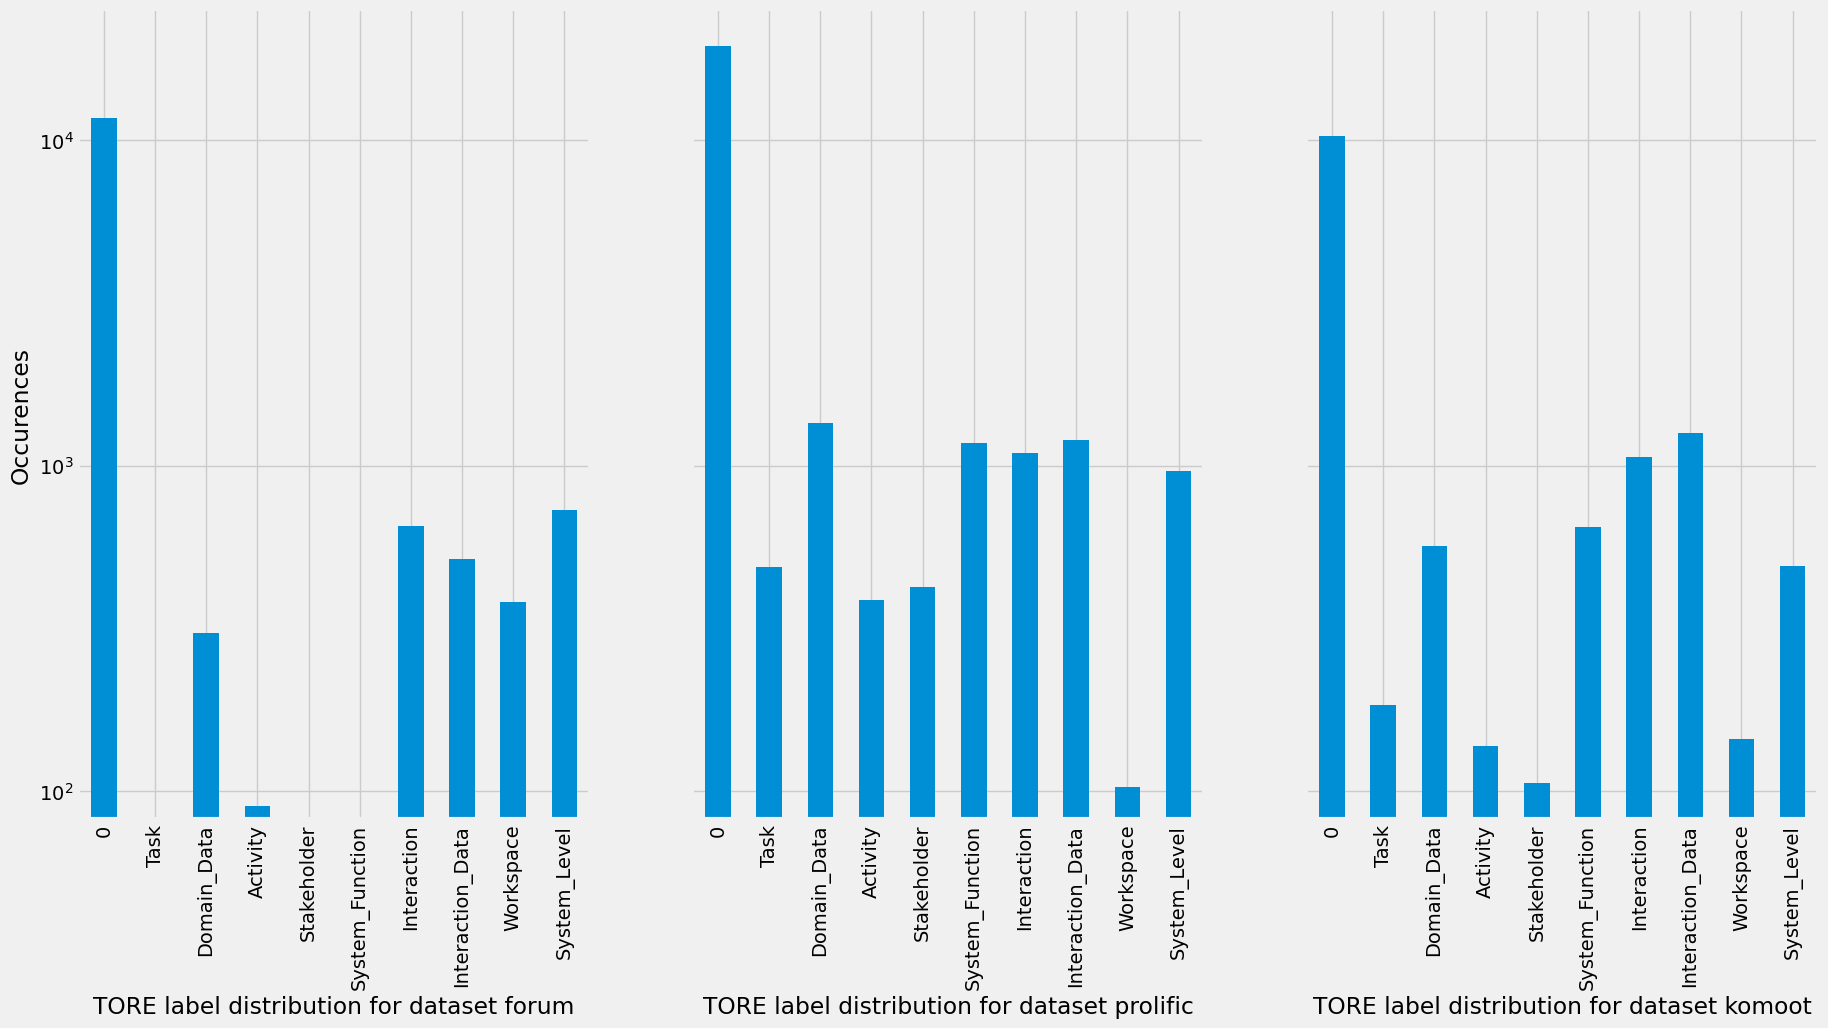

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)


for idx, dataset in enumerate(["forum", "prolific", "komoot"]):
    base_experiment_config = Experiment(
        name="Base Config", iterations=1, force=False, dataset=dataset
    )

    cfg: SNERConfig = OmegaConf.structured(
        SNERConfig(
            sner=SNER(),
            experiment=base_experiment_config,
            transformation=final_label_transformation_config,
        )
    )

    run_name = f"dataset_stats_{dataset}"

    transformed_dataset = transform_dataset(
        cfg, run_name, fill_with_zeros=True
    )["dataset"]

    tore_label = transformed_dataset[["tore_label"]].value_counts()

    tore_label = tore_label.sort_index(
        key=lambda x: list(map(list(LABELS_NONE).index, x))
    )

    print("Post Transformation")
    rich.print(tore_label)

    ticks = [index[0] for index in tore_label.index.tolist()]

    ax = tore_label.plot.bar(
        ax=axes[idx],
        logy=True,
        xlabel=f"TORE label distribution for dataset {dataset}",
        ylabel="Occurences",
        xticks=range(len(ticks)),
    )

    ax.set_xticks(range(len(ticks)), ticks)

fig.set_figwidth(20)
fig.set_figheight(10)

fig.savefig(
    savepath.joinpath("label_distribution_transformed.png"),
    bbox_inches="tight",
)

plt.show()

Describe Token Label Ratio
count    865.000000
mean       0.196254
std        0.178776
min        0.000000
25%        0.000000
50%        0.187500
75%        0.285714
max        1.000000
Name: ratio, dtype: float64
correlation=0.6597698604405842
Describe Token Label Ratio
count    1344.000000
mean        0.265241
std         0.143990
min         0.000000
25%         0.166667
50%         0.266667
75%         0.358974
max         0.777778
Name: ratio, dtype: float64
correlation=0.7210234788458411
Describe Token Label Ratio
count    901.000000
mean       0.278972
std        0.167518
min        0.000000
25%        0.166667
50%        0.285714
75%        0.388889
max        0.833333
Name: ratio, dtype: float64
correlation=0.8450514941711386


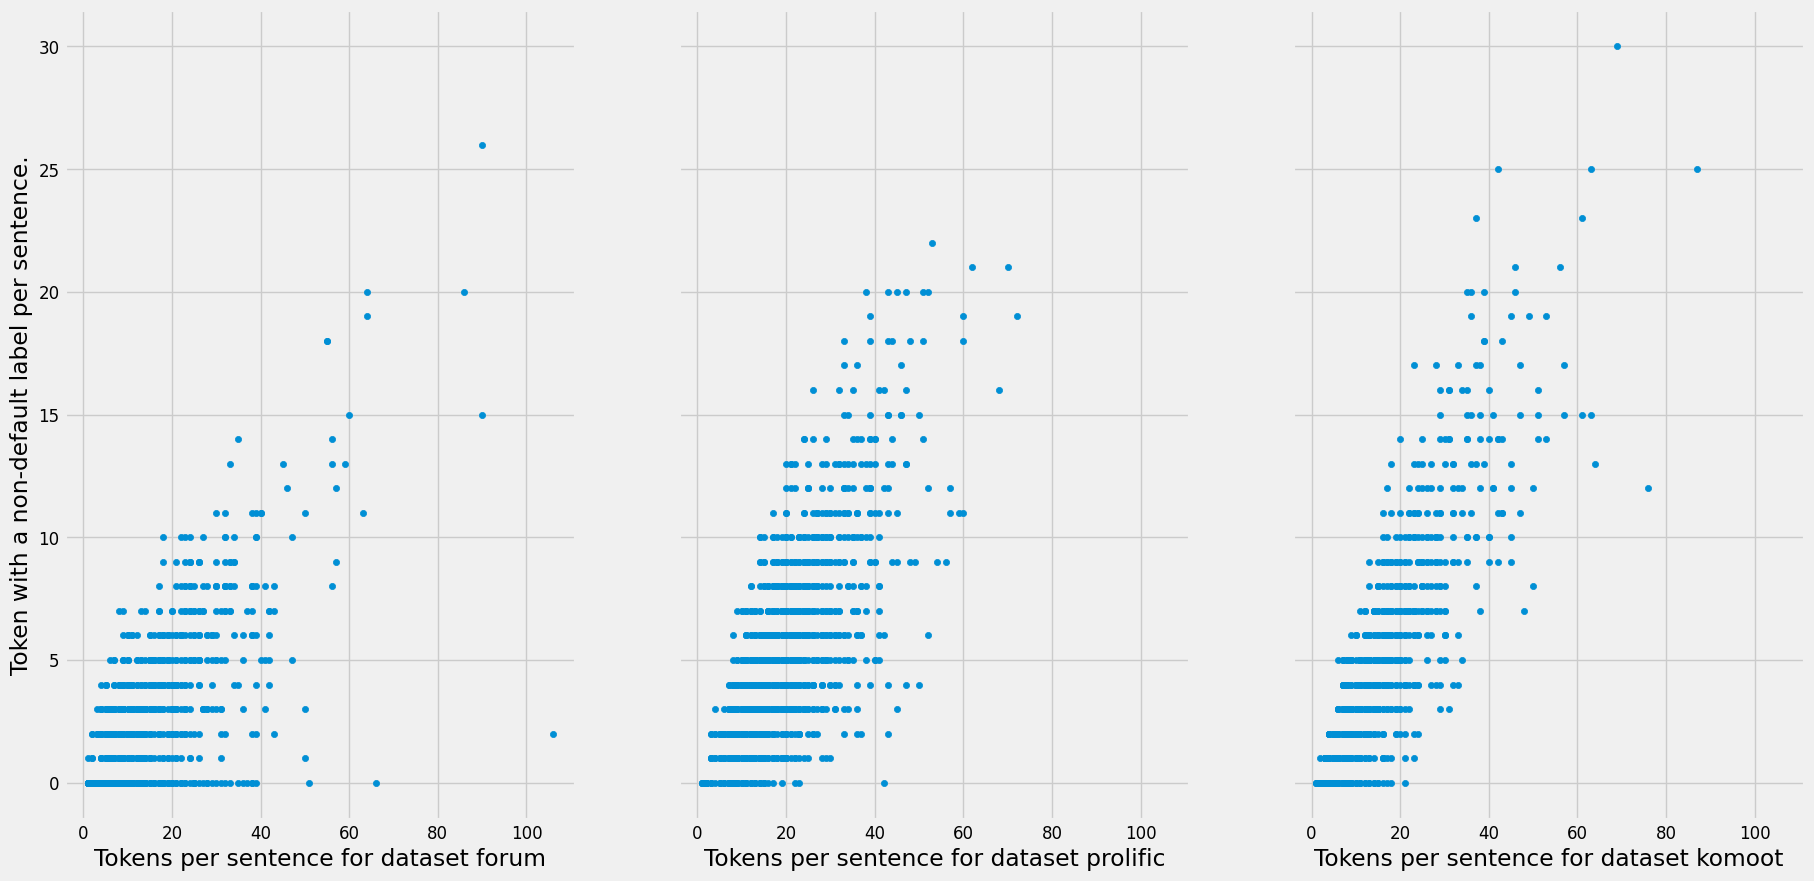

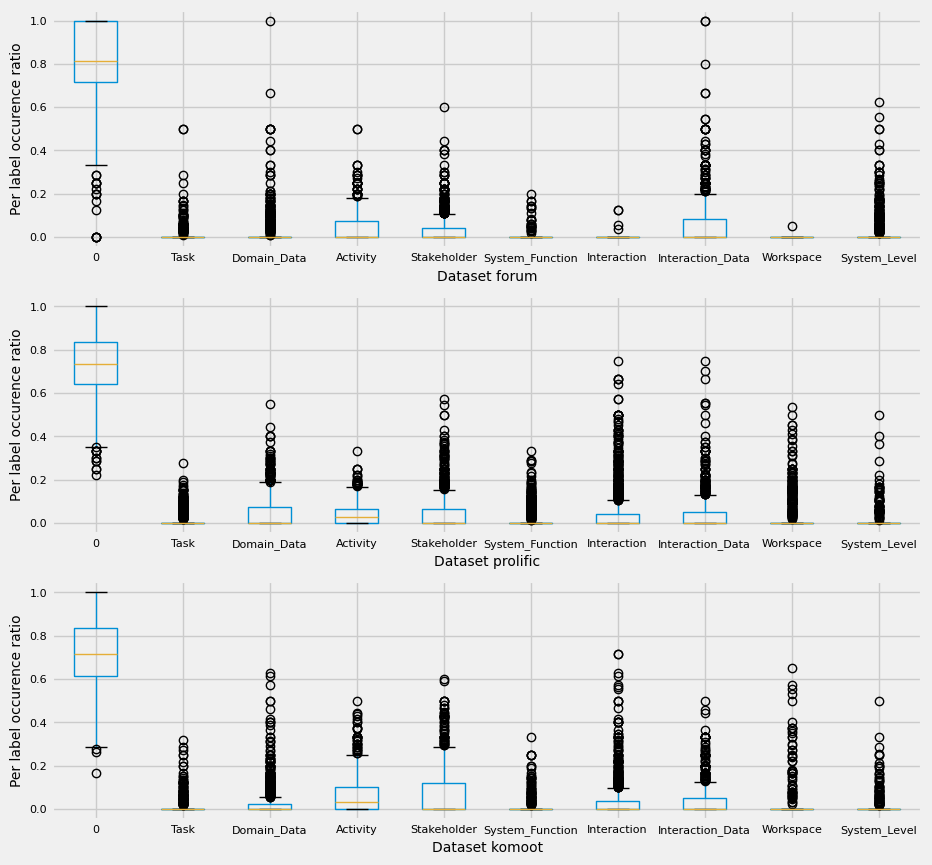

['0',
 'Task',
 'Domain_Data',
 'Activity',
 'Stakeholder',
 'System_Function',
 'Interaction',
 'Interaction_Data',
 'Workspace',
 'System_Level']

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)

box_fig, box_axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=True)

data = []

for idx, dataset in enumerate(["forum", "prolific", "komoot"]):
    base_experiment_config = Experiment(
        name="Base Config", iterations=1, force=False, dataset=dataset
    )

    cfg: SNERConfig = OmegaConf.structured(
        SNERConfig(
            sner=SNER(),
            experiment=base_experiment_config,
            transformation=final_label_transformation_config,
        )
    )
    run_name = f"dataset_stats_{dataset}"

    import_dataset(cfg, run_name=run_name)

    transformed_dataset = transform_dataset(
        cfg, run_name, fill_with_zeros=True
    )["dataset"]

    simplified_dataset = transformed_dataset[["sentence_id", "tore_label"]]

    transformed_dataset.loc[
        transformed_dataset["tore_label"] != "0", "tore_label"
    ] = 1
    transformed_dataset.loc[
        transformed_dataset["tore_label"] == "0", "tore_label"
    ] = 0

    grouped = transformed_dataset.groupby("sentence_id")

    token_label_ratio = pd.concat(
        {
            "distinct_labels": (
                simplified_dataset.groupby(["sentence_id"]).nunique() - 1
            )["tore_label"],
            "label_count": grouped["tore_label"].sum(),
            "token_count": grouped["tore_label"].count(),
        },
        axis=1,
    )
    token_label_ratio["ratio"] = pd.to_numeric(
        token_label_ratio["label_count"] / token_label_ratio["token_count"]
    )

    print("Describe Token Label Ratio")
    print(token_label_ratio["ratio"].describe())

    token_label_ratio.plot(
        ax=axes[idx],
        kind="scatter",
        x="token_count",
        y="label_count",
        xlabel=f"Tokens per sentence for dataset {dataset}",
        ylabel="Token with a non-default label per sentence.",
        fontsize=12,
    )

    correlation = (
        token_label_ratio["label_count"]
        .astype("float")
        .corr(token_label_ratio["token_count"].astype("float"))
    )
    print(f"{correlation=}")

    ticks = [index[0] for index in tore_label.index.tolist()]

    grouped_by_sentence_id = simplified_dataset.groupby(
        ["sentence_id"], as_index=False
    )

    # print(grouped_by_sentence_id.sample())

    normalized = grouped_by_sentence_id.value_counts(normalize=True)

    data.append(normalized)

    # print(normalized.sample())

    normalized_grouped = normalized.groupby("tore_label")

    # print(normalized_grouped.sample())

    # normalized_grouped.boxplot(
    normalized.pivot(
        index="sentence_id", columns="tore_label", values="proportion"
    ).fillna(0).boxplot(
        ax=box_axes[idx],
        figsize=(20, 6),
        # subplots=False,
        showfliers=True,
        fontsize=8,
        ylabel="Per label occurence ratio",
        xlabel=f"Dataset {dataset}",
    )
    box_axes[idx].set_xticks(range(1, len(ticks) + 1), ticks)
    box_axes[idx].tick_params(axis="y", labelsize=8)
    box_axes[idx].yaxis.label.set_fontsize(10)
    box_axes[idx].xaxis.label.set_fontsize(10)


fig.set_figwidth(20)
fig.set_figheight(10)


box_fig.set_figwidth(10)
box_fig.set_figheight(10)


fig.savefig(savepath.joinpath("token_label_ratio.png"), bbox_inches="tight")
box_fig.savefig(
    savepath.joinpath("per_label_occurence_boxplot.png"), bbox_inches="tight"
)


plt.show()